In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [3]:
salary_data = pd.read_csv('salary_data_states.csv')
salary_data

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.00,year,62171.00,year,SOFTWARE ENGINEER,...,"Software Developers, Applications",Illinois,IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.00,year,91440.00,year,Assistant Professor of Marketing,...,"Business Teachers, Postsecondary",California,CA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.00,year,49470.00,year,SPECIAL EDUCATION TEACHER,...,"Special Education Teachers, Kindergarten and E...",California,CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.00,month,43800.00,year,SCIENCE TEACHER,...,"Biological Science Teachers, Postsecondary",Texas,TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.00,bi-weekly,170000.00,year,SENIOR SOFTWARE ENGINEER,...,"Software Developers, Systems Software",Oregon,OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167273,I-200-12241-209885,certified-withdrawn,8/28/2012,6/6/2013,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",5.05,hour,5.60,hour,MIDDLE SCHOOL TEACHERS,...,"Middle School Teachers, Except Special and Car...",Northern Mariana Islands,MP,NaN,y,H-1B,10504.0,11648.0,teacher,167357
167274,I-200-11305-143547,denied,11/1/2011,11/3/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",5.05,hour,5.25,hour,PRESCHOOL TEACHER,...,"Preschool Teachers, Except Special Education",Northern Mariana Islands,MP,NaN,y,H-1B,10504.0,10920.0,teacher,167358
167275,I-200-11313-833007,certified,11/9/2011,11/16/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",5.05,hour,5.25,hour,TEACHER,...,"Teachers and Instructors, All Other*",Northern Mariana Islands,MP,NaN,y,H-1B,10504.0,10920.0,teacher,167359
167276,I-200-11312-798611,denied,11/8/2011,11/15/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",5.05,hour,5.10,hour,PRESCHOOL TEACHER,...,"Preschool Teachers, Except Special Education",Northern Mariana Islands,MP,NaN,y,H-1B,10504.0,10608.0,teacher,167360


In [4]:
salary_data['JOB_TITLE_SUBGROUP'].unique()

array(['software engineer', 'assistant professor', 'teacher',
       'business analyst', 'management consultant', 'data analyst',
       'attorney', 'data scientist'], dtype=object)

In [5]:
salary_data.describe()

,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED,EXPERIENCE_REQUIRED_NUM_MONTHS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,order
count,1.672780e+05,1.672780e+05,4965.000000,167210.000000,1.672780e+05,167278.000000
mean,7.115752e+04,8.164186e+04,34.692044,74274.868236,8.553277e+04,83714.716305
std,3.874624e+04,4.147703e+04,22.317783,25356.245893,3.873847e+04,48300.236431
min,5.050000e+00,5.050000e+00,0.000000,10504.000000,1.050000e+04,1.000000
25%,5.447500e+04,6.100000e+04,12.000000,56880.000000,6.300000e+04,41901.250000
50%,6.970100e+04,7.700000e+04,24.000000,70928.000000,7.860000e+04,83722.500000
75%,8.993700e+04,1.000000e+05,60.000000,90459.000000,1.000060e+05,125541.750000
max,6.217100e+06,2.500000e+06,144.000000,320000.000000,2.500000e+06,167361.000000


In [6]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167278 entries, 0 to 167277
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   CASE_NUMBER                     167278 non-null  object 
 1   CASE_STATUS                     167278 non-null  object 
 2   CASE_RECEIVED_DATE              167278 non-null  object 
 3   DECISION_DATE                   167278 non-null  object 
 4   EMPLOYER_NAME                   167278 non-null  object 
 5   PREVAILING_WAGE_SUBMITTED       167278 non-null  float64
 6   PREVAILING_WAGE_SUBMITTED_UNIT  167278 non-null  object 
 7   PAID_WAGE_SUBMITTED             167278 non-null  float64
 8   PAID_WAGE_SUBMITTED_UNIT        167278 non-null  object 
 9   JOB_TITLE                       167278 non-null  object 
 10  WORK_CITY                       167275 non-null  object 
 11  EDUCATION_LEVEL_REQUIRED        11093 non-null   object 
 12  COLLEGE_MAJOR_RE

In [7]:
salary_data.head()

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,...,"Software Developers, Applications",Illinois,IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,...,"Business Teachers, Postsecondary",California,CA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,...,"Special Education Teachers, Kindergarten and E...",California,CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,...,"Biological Science Teachers, Postsecondary",Texas,TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,...,"Software Developers, Systems Software",Oregon,OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


In [8]:
salary_data['JOB_TITLE_SUBGROUP'].value_counts()

software engineer        99364
business analyst         27811
assistant professor      18866
teacher                  13912
data analyst              3840
attorney                  1488
data scientist            1227
management consultant      770
Name: JOB_TITLE_SUBGROUP, dtype: int64

In [10]:
salary_data['JOB_TITLE'].unique()

array(['SOFTWARE ENGINEER', 'Assistant Professor of Marketing',
       'SPECIAL EDUCATION TEACHER', ...,
       'BILINGUAL SPECIAL EDUCAITON TEACHER ASSISTANT',
       'BILINGUAL SPECIAL EDUCATIN TEACHER ASSISTANT',
       'BILINGUAL SPECIAL EDUCATION TEACHER ASSISTANT'], dtype=object)

In [11]:
salary_data['PREVAILING_WAGE_SOC_TITLE'].value_counts()

Software Developers, Applications                     52066
SOFTWARE DEVELOPERS, APPLICATIONS                     21085
Software Developers, Systems Software                 13176
Computer Systems Analysts                             12186
Management Analysts                                    5886
                                                      ...  
PSYCHOLOGISTS, ALL OTHER                                  1
SOCIOLOGISTS                                              1
ASTRONOMERS                                               1
CAREER/TECHNICAL EDUCATION TEACHERS, MIDDLE SCHOOL        1
Coaches and Scouts                                        1
Name: PREVAILING_WAGE_SOC_TITLE, Length: 561, dtype: int64

In [12]:
salary_data['WORK_STATE'].value_counts()

California                  46782
Texas                       15498
New York                    11373
New Jersey                  10198
Illinois                     7411
Massachusetts                6848
Virginia                     6031
Georgia                      5615
Pennsylvania                 4725
Washington                   4610
Florida                      4064
Michigan                     3844
North Carolina               3578
Maryland                     3275
Ohio                         3192
Missouri                     2773
Arizona                      2570
Minnesota                    2116
Connecticut                  2023
Indiana                      1617
Colorado                     1614
Oregon                       1535
Wisconsin                    1433
District of Columbia         1370
Tennessee                    1087
Iowa                         1012
Louisiana                     883
Delaware                      874
South Carolina                851
Utah          

In [13]:
average_wage = salary_data['PAID_WAGE_SUBMITTED'].mean()


average_wage

81641.85521248459

In [14]:
max_wage = salary_data['PAID_WAGE_SUBMITTED'].max()
max_wage

2500000.0

In [15]:
min_wage = salary_data['PAID_WAGE_SUBMITTED'].min()
min_wage

5.05

In [16]:
median_wage = salary_data['PAID_WAGE_SUBMITTED'].median()
median_wage

77000.0

In [17]:
print(f"Median Wage: {median_wage}")
print(f"Average Wage: {average_wage}")
print(f"Maximum Wage: {max_wage}")
print(f"Minimum Wage: {min_wage}")

Median Wage: 77000.0
Average Wage: 81641.85521248459
Maximum Wage: 2500000.0
Minimum Wage: 5.05


In [18]:
#Prevailing Wage Stats
averagep_wage = salary_data['PREVAILING_WAGE_SUBMITTED'].mean()
minp_wage = salary_data['PREVAILING_WAGE_SUBMITTED'].min()
maxp_wage = salary_data['PREVAILING_WAGE_SUBMITTED'].max()
medianp_wage = salary_data['PREVAILING_WAGE_SUBMITTED'].median()

print(f"Median Wage: {medianp_wage}")
print(f"Average Wage: {averagep_wage}")
print(f"Maximum Wage: {maxp_wage}")
print(f"Minimum Wage: {minp_wage}")

Median Wage: 69701.0
Average Wage: 71157.5188296369
Maximum Wage: 6217100.0
Minimum Wage: 5.05


C:\Users\daysg\AppData\Local\Temp\ipykernel_3144\954211631.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=salary_data['PREVAILING_WAGE_SUBMITTED']);


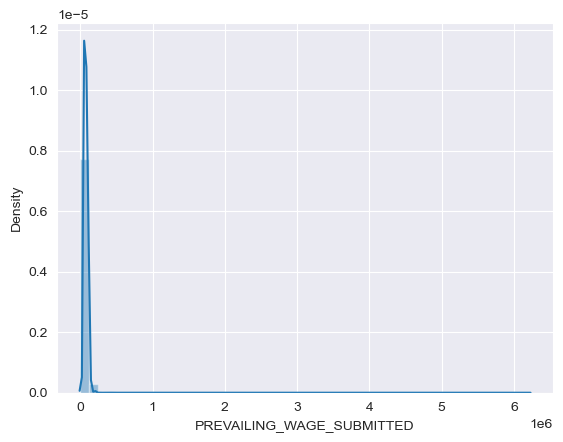

In [17]:
sns.set_style('darkgrid')
sns.distplot(a=salary_data['PREVAILING_WAGE_SUBMITTED']);
# For more recent versions of seaborn:
# sns.histplot(data=heart_df['age'], kde=True);

In [18]:
salary_data.groupby('JOB_TITLE')['PAID_WAGE_PER_YEAR'].mean()

JOB_TITLE
*** Software Engineer (Secure Constrained Embedded Systems - Interactive TV)    119600.000000
A.V.P., SENIOR BUSINESS ANALYST                                                  86700.000000
ABAP SOFTWARE ENGINEER                                                           71448.000000
ACADEMIC CLINICIAN ASSISTANT PROFESSOR                                          135000.000000
ACADEMIC CLINICIAN, ASSISTANT PROFESSOR OF CLINICA                              145600.000000
                                                                                    ...      
iOS SOFTWARE ENGINEER                                                            83075.200000
iOS Software Engineer                                                           135000.000000
iTunes Customer Data Analyst                                                    128190.000000
software engineer                                                               106707.312281
software engineer /developer                      

In [19]:
salary_data.groupby("JOB_TITLE")["PAID_WAGE_PER_YEAR"]

In [20]:
salary_data.groupby('JOB_TITLE')['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=True).tail(5)

JOB_TITLE
LITIGATION ATTORNEY                        624000.0
NETWORK SOFTWARE ENGINEER IV               672720.3
COMPUTER SCIENCE TEACHER POSTSECONDARY     690000.0
COMPUTER SCIENCE TEACHER POST SECONDARY    690000.0
Technical Data Analyst                     746323.0
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [21]:
salary_data.groupby('JOB_TITLE')['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=True).head(5)

JOB_TITLE
ELECTRONIC AND COMPUTER TEACHER             17451.2
MUSIC TEACHER (DOUBLE BASS)                 17490.0
EDUCATION TEACHER                           17680.0
FOREIGN LANGUAGE TEACHER / ADMINISTRATOR    17680.0
PRE-KINDERGARTEN TEACHER ASSISTANT          18300.0
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [20]:
salary_data.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=True)

JOB_TITLE_SUBGROUP
teacher                   46039.985507
data analyst              70030.078688
business analyst          71300.079566
software engineer         92505.303013
assistant professor       94876.713707
data scientist           108021.038248
management consultant    108251.334662
attorney                 146413.596714
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [22]:
salary_data['PAID_WAGE_PER_YEAR'] >= 100000.0

0         False
1         False
2         False
3         False
4          True
          ...  
167273    False
167274    False
167275    False
167276    False
167277    False
Name: PAID_WAGE_PER_YEAR, Length: 167278, dtype: bool

In [ ]:
state_counts = salary_data['WORK_STATE'].value_counts()
high_counts = state_counts[state_counts >= 10000]

C:\Users\daysg\AppData\Local\Temp\ipykernel_3144\3664696334.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=high_counts.index, rotation=80);


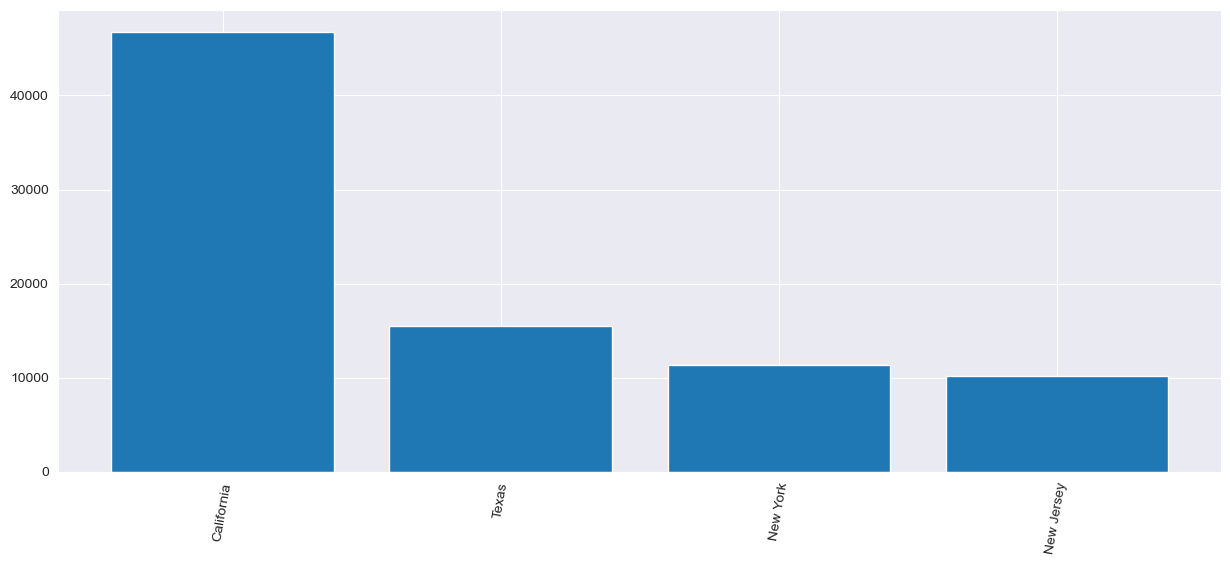

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x=high_counts.index, height=high_counts)
ax.set_xticklabels(labels=high_counts.index, rotation=80);

In [34]:
hour_wage = salary_data[salary_data['PREVAILING_WAGE_SUBMITTED_UNIT'] == 'year']
hour_wage = salary_data.groupby('JOB_TITLE_SUBGROUP')['PREVAILING_WAGE_SUBMITTED'].mean()
                                
print(hour_wage)

JOB_TITLE_SUBGROUP
assistant professor      55350.886796
attorney                 91326.411022
business analyst         59356.259678
data analyst             59861.359354
data scientist           89799.037408
management consultant    47947.593416
software engineer        82212.129471
teacher                  37829.948856
Name: PREVAILING_WAGE_SUBMITTED, dtype: float64


In [35]:
hour2_wage = salary_data[salary_data['PREVAILING_WAGE_SUBMITTED_UNIT'] == 'year']
hour2_wage = salary_data.groupby('JOB_TITLE_SUBGROUP')['PREVAILING_WAGE_SUBMITTED'].median()
                                
print(hour2_wage)

JOB_TITLE_SUBGROUP
assistant professor      50660.0
attorney                 85956.0
business analyst         60507.0
data analyst             59550.0
data scientist           89107.0
management consultant    57470.5
software engineer        80922.5
teacher                  40680.0
Name: PREVAILING_WAGE_SUBMITTED, dtype: float64
